#**Lab 1 Klasifikasi Bunga Iris dengan Perceptron**

**Langkah 1 - Import Library**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**Langkah 2 - Load Data dan Visualisasi**

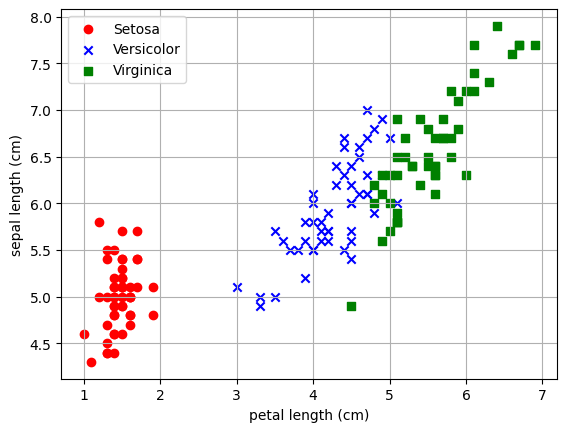

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Pembelarajan Mesin/Minggu 13/iris.csv')

setosa = df[df['species'] == 'setosa']
versicolor = df[df['species'] == 'versicolor']
virginica = df[df['species'] == 'virginica']

a = 'petal length (cm)'
b = 'sepal length (cm)'

plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='Setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='Versicolor')
plt.scatter(virginica[a], virginica[b], color='green', marker='s', label='Virginica')

plt.xlabel(a)
plt.ylabel(b)
plt.legend(loc='upper left')
plt.grid()
plt.show()


In [4]:
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Langkah 3 - Membuat Kelas Perceptron**

In [5]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

**Langkah 4 - Pilih Data dan Encoding Label**

In [6]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'setosa', -1, 1)
X = df.iloc[0:100, [0, 3]].values

**Langkah 5 - Fitting Model**

In [7]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

**Langkah 6 - Visualisasi Nilai Error Per Epoch**

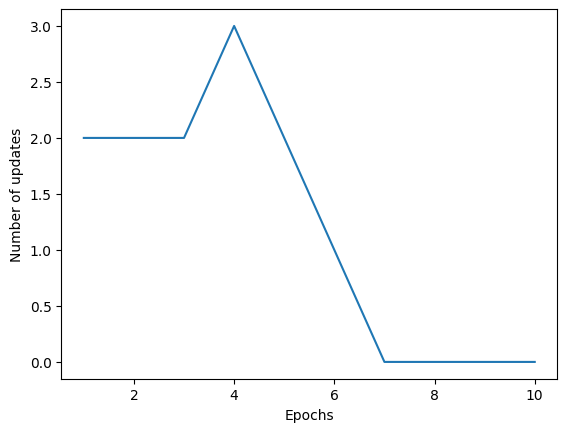

In [8]:
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

**Langkah 7 - Visualisasi Decision Boundary**

In [10]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # markers dan warna
    markers = ('s', 'x')
    colors = ('red', 'blue')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # menentukan area plot (grid)
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution)
    )

    # prediksi class untuk setiap titik grid
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # plot boundary (kontur)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot sample
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            x=X[y == cl, 0],
            y=X[y == cl, 1],
            alpha=0.8,
            c=[cmap(idx)],
            marker=markers[idx],
            label='setosa' if cl == -1 else 'versicolor'
        )


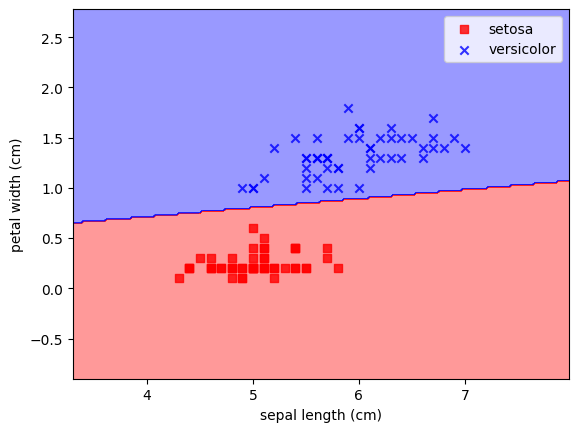

In [11]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()
plt.show()
